# Import Libraries


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import warnings
warnings.simplefilter(action='ignore')

# Read CSV

In [43]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning

In [44]:
df.shape

(5110, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [46]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [47]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [48]:
df.drop(['id'], axis=1, inplace=True)

In [49]:
# df['bmi'].fillna(df['bmi'].mean())

df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['bmi']

0       36.6
1       28.1
2       32.5
3       34.4
4       24.0
        ... 
5105    28.1
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [50]:
df.duplicated().sum()

0

In [51]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Visulization Category Features With Target 

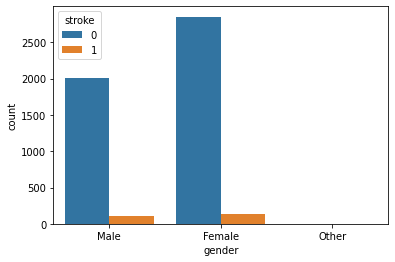

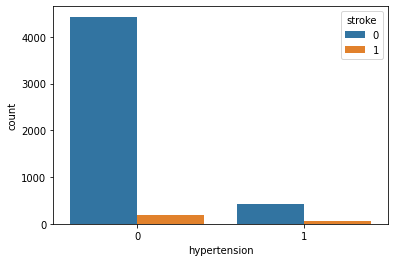

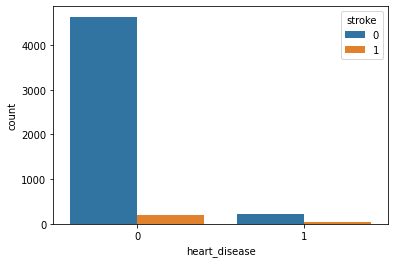

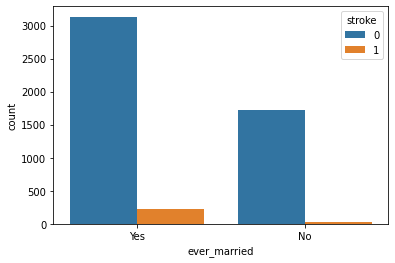

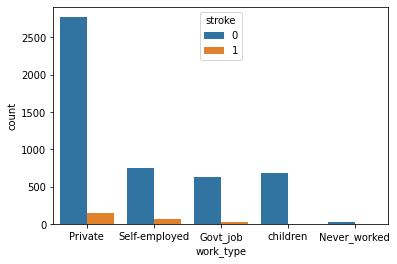

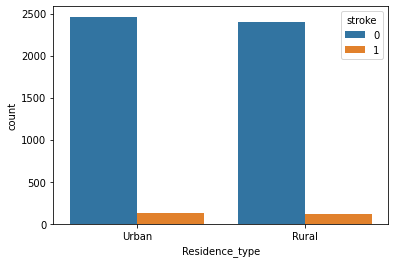

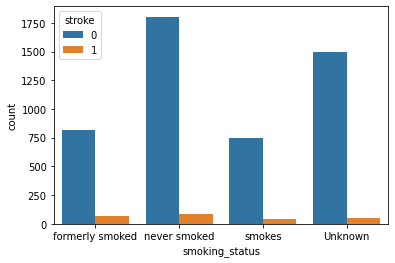

In [52]:
for col in df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]:
    sns.countplot(df[col], hue=df['stroke'])
    plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [54]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [55]:
df['gender'] = df['gender'].replace('Other','Female')

In [56]:
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [57]:
df['gender'].value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [58]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [59]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [60]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [61]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [62]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [63]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [64]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [66]:
# Visulization Numerical Features

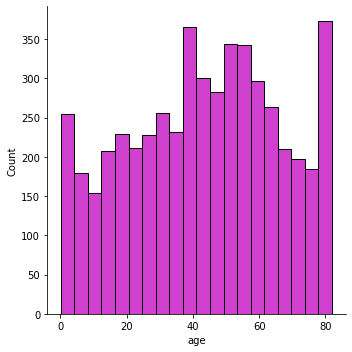

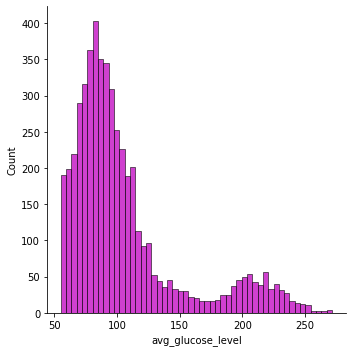

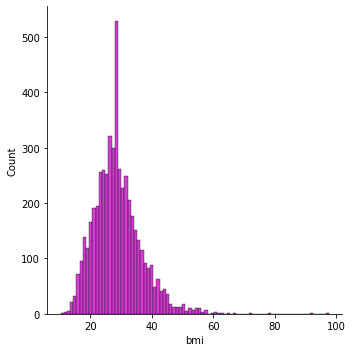

In [67]:
for col in df[['age','avg_glucose_level','bmi']]:
    sns.displot(df[col], color='m')
    plt.show()

# See Correlation 

<AxesSubplot:>

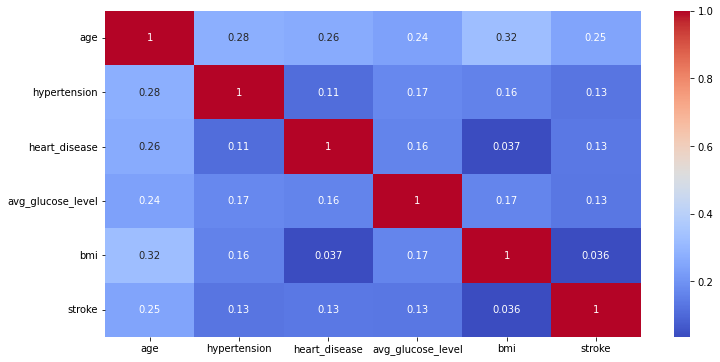

In [68]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm' ,annot=True)

# Encoding


In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df[['gender','ever_married','work_type','Residence_type','smoking_status']]:
    df[col] = le.fit_transform(df[col])

# Build Machine Learning Model

In [70]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [71]:
x = df.drop(columns=['stroke'])
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


In [72]:
y = df['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# Split Data into Train and Test

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2 , )
print(x_train.shape)
print(x_test.shape)

(4088, 10)
(1022, 10)


# Use Feature Scaling to Make Values Has The Same Range 

In [74]:
scaler = StandardScaler()
x_train[['age','avg_glucose_level','bmi']] = scaler.fit_transform(x_train[['age','avg_glucose_level','bmi']])
x_test[['age','avg_glucose_level','bmi']] = scaler.transform(x_test[['age','avg_glucose_level','bmi']])

In [75]:
new_descripe = pd.DataFrame(x_train)
new_descripe.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,4088.000000,4.088000e+03,4088.000000,4088.000000,4088.000000,4088.000000,4088.00000,4.088000e+03,4.088000e+03,4088.000000
mean,0.415851,2.116159e-16,0.098337,0.055528,0.655333,2.169765,0.50954,1.497769e-17,-2.010786e-16,1.371331
std,0.492928,1.000122e+00,0.297806,0.229037,0.475318,1.097429,0.49997,1.000122e+00,1.000122e+00,1.070127
min,0.000000,-1.899760e+00,0.000000,0.000000,0.000000,0.000000,0.00000,-1.132681e+00,-2.416291e+00,0.000000
25%,0.000000,-7.990526e-01,0.000000,0.000000,0.000000,2.000000,0.00000,-6.419255e-01,-6.539398e-01,0.000000
50%,0.000000,4.017061e-02,0.000000,0.000000,1.000000,2.000000,1.00000,-3.116967e-01,-1.096842e-01,2.000000
75%,1.000000,7.910545e-01,0.000000,0.000000,1.000000,3.000000,1.00000,1.765711e-01,5.252807e-01,2.000000
max,1.000000,1.718617e+00,1.000000,1.000000,1.000000,4.000000,1.00000,3.657020e+00,8.896451e+00,3.000000


# Train and Test Model

In [76]:
models = {
    "LOR": LogisticRegression(),
    "KNNC" : KNeighborsClassifier(),
    "DT" : DecisionTreeClassifier(),
    "RF" : RandomForestClassifier(),
    "XGB" : xgb.XGBClassifier(),
    "SVC" : SVC()}

for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    y_pred_test = model.predict(x_test)
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*30)

Using model: LOR
Training Score: 0.951320939334638
Test Score: 0.952054794520548
------------------------------
Using model: KNNC
Training Score: 0.9525440313111546
Test Score: 0.9471624266144814
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.9246575342465754
------------------------------
Using model: RF
Training Score: 1.0
Test Score: 0.9510763209393346
------------------------------
Using model: XGB
[01:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score: 0.9973091976516634
Test Score: 0.9422700587084148
------------------------------
Using model: SVC
Training Score: 0.9510763209393346
Test Score: 0.952054794520548
------------------------------


## But IF We Note Target Feature is an Imbalanced class so, Model Will Predict To the Majority class.
### We Will Solve This Problem By Using  Over Sampling Method To Make IT Balanced Class.

In [83]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('stroke', axis=1), df['stroke'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [90]:
oversampled_X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1
1,0,61.000000,0,0,1,3,0,202.210000,28.100000,2
2,1,80.000000,0,1,1,2,0,105.920000,32.500000,2
3,0,49.000000,0,0,1,2,1,171.230000,34.400000,3
4,0,79.000000,1,0,1,3,0,174.120000,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
9717,0,79.871507,1,0,1,2,0,175.139663,30.536304,1
9718,0,70.908861,0,0,1,0,1,262.839699,38.754683,1
9719,1,80.000000,0,0,1,2,0,254.704872,30.844695,1
9720,0,74.953742,0,0,1,3,0,78.622369,29.175103,1


In [91]:
oversampled_Y

0       1
1       1
2       1
3       1
4       1
       ..
9717    1
9718    1
9719    1
9720    1
9721    1
Name: stroke, Length: 9722, dtype: int64

In [84]:
X = oversampled.drop('stroke', axis=1)
Y = oversampled['stroke']

In [85]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1
1,0,61.000000,0,0,1,3,0,202.210000,28.100000,2
2,1,80.000000,0,1,1,2,0,105.920000,32.500000,2
3,0,49.000000,0,0,1,2,1,171.230000,34.400000,3
4,0,79.000000,1,0,1,3,0,174.120000,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
9717,0,79.871507,1,0,1,2,0,175.139663,30.536304,1
9718,0,70.908861,0,0,1,0,1,262.839699,38.754683,1
9719,1,80.000000,0,0,1,2,0,254.704872,30.844695,1
9720,0,74.953742,0,0,1,3,0,78.622369,29.175103,1


In [86]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
9717    1
9718    1
9719    1
9720    1
9721    1
Name: stroke, Length: 9722, dtype: int64

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)            

In [88]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [89]:
models = {
    "LOR": LogisticRegression(),
    "KNNC" : KNeighborsClassifier(),
    "DT" : DecisionTreeClassifier(),
    "RF" : RandomForestClassifier(),
    "XGB" : xgb.XGBClassifier(),
    "SVC" : SVC()}

for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    y_pred_test = model.predict(x_test)
    print(f'Test Score: {model.score(x_test, y_test)}') 
    print('-'*30)

Using model: LOR
Training Score: 0.8125241095538125
Test Score: 0.8102827763496144
------------------------------
Using model: KNNC
Training Score: 0.9110196733959111
Test Score: 0.8724935732647815
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.8997429305912596
------------------------------
Using model: RF
Training Score: 1.0
Test Score: 0.9491002570694087
------------------------------
Using model: XGB
[01:21:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score: 0.993056448501993
Test Score: 0.9624678663239075
------------------------------
Using model: SVC
Training Score: 0.8640864086408641
Test Score: 0.8493573264781491
------------------------------
